<a href="https://colab.research.google.com/github/raghavxi1/Fire_Detection_Model/blob/main/XGB_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow --break-system-packages
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [3]:
!export TF_ENABLE_ONEDNN_OPTS=0

In [4]:
import tensorflow as tf
from tensorflow. keras import layers, Model
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
input_columns = [
    'CO2_Room', 'CO_Room', 'H2_Room', 'Humidity_Room', 'PM05_Room', 'PM100_Room',
    'PM10_Room', 'PM25_Room', 'PM40_Room', 'PM_Room_Typical_Size', 'PM_Total_Room',
    'Temperature_Room', 'VOC_Room', 'VOC_Room_RAW',
    'CO2_Room_Trend', 'CO_Room_Trend', 'H2_Room_Trend', 'PM05_Room_Trend',
    'PM10_Room_Trend', 'PM25_Room_Trend', 'PM40_Room_Trend', 'PM100_Room_Trend',
    'PM_Room_Typical_Size_Trend', 'VOC_Room_RAW_Trend'
]

# Ignored: Unnamed: 0, Date, Sensor_ID, scenario_label, number_label, UV_Room, Interval_label, class
# Target (y)
target_column = 'class'

In [5]:
df = pd.read_csv('Laboratory Fire Dataset containing Multi Sensor Data.csv')

In [6]:
df.head()

,Unnamed: 0,Date,Sensor_ID,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,0,0,sensornode0005,568.4,-0.15,0.58,42.44,46,0,7,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.0,0.0,0.0,-0.766667,0.726667
1,1,0,sensornode0006,637.3,-0.12,0.79,42.34,48,0,7,...,-0.876667,0.920000,-0.960000,-0.936667,-0.756667,0.0,0.0,0.0,0.296667,0.696667
2,2,0,sensornode0007,792.2,-0.19,0.39,42.92,52,0,8,...,0.320000,0.906667,-0.826667,-0.966667,-0.826667,0.0,0.0,0.0,0.140000,0.583333
3,3,0,sensornode0008,660.7,0.65,0.53,44.31,50,0,7,...,-0.036667,0.960000,-0.933333,-0.936667,-0.850000,0.0,0.0,0.0,-0.123333,0.896667
4,4,10,sensornode0005,592.5,-0.06,0.38,42.55,48,0,7,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.0,0.0,0.0,-0.766667,0.726667


In [7]:
df_data = df[input_columns].copy()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_data), columns=input_columns)
df_scaled.head()

,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,PM25_Room,PM40_Room,PM_Room_Typical_Size,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,-0.481909,-0.514276,-0.336817,0.364765,-0.629880,-0.387102,-0.489971,-0.427968,-0.422426,-0.567421,...,-1.138983,1.183488,-1.321759,-1.524677,-1.389160,-0.118454,-0.190139,-0.213317,-1.774190,0.905671
1,-0.415762,-0.513073,-0.305865,0.347072,-0.629756,-0.387102,-0.489971,-0.427968,-0.422426,-0.567421,...,-1.599214,1.161468,-1.321759,-1.545308,-1.355242,-0.118454,-0.190139,-0.213317,0.697838,0.866244
2,-0.267050,-0.515879,-0.364821,0.449692,-0.629508,-0.387102,-0.489897,-0.427968,-0.422426,-0.408544,...,0.236596,1.139449,-1.148266,-1.607201,-1.497696,-0.118454,-0.190139,-0.213317,0.333621,0.717301
3,-0.393296,-0.482210,-0.344186,0.695627,-0.629632,-0.387102,-0.489971,-0.427968,-0.422426,-0.758073,...,-0.310568,1.227526,-1.287060,-1.545308,-1.545181,-0.118454,-0.190139,-0.213317,-0.278574,1.129086
4,-0.458772,-0.510668,-0.366295,0.384228,-0.629756,-0.387102,-0.489971,-0.427968,-0.422426,-0.567421,...,-1.138983,1.183488,-1.321759,-1.524677,-1.389160,-0.118454,-0.190139,-0.213317,-1.774190,0.905671


In [8]:
# Hyperparameters
LATENT_DIM = 100  # Dimension of the noise vector (z)
DATA_DIM = len(input_columns)  # 24 features
BATCH_SIZE = 118
EPOCHS = 100  # Start with a moderate number of epochs
LEARNING_RATE = 0.0002
BETA_1 = 0.5  # Standard for GANs with Adam optimizer

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(df_scaled.values.astype('float32')).shuffle(10000).batch(BATCH_SIZE)
dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 24), dtype=tf.float32, name=None)>

In [14]:
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
def build_generator(latent_dim, data_dim):
    """Defines the Generator model."""
    model = tf.keras.Sequential([
        # Input: Noise vector (latent_dim)

        Dense(256, use_bias=False, input_shape=(latent_dim,)),
        LeakyReLU(negative_slope=0.4), # negative_slope older alpha

        Dense(512, use_bias=False),
        LeakyReLU(negative_slope=0.3),

        # Output: Synthetic data (data_dim). Use 'tanh' since data is Standard Scaled (-1 to 1 range)
        Dense(data_dim, activation='tanh')
    ], name="Generator")
    return model

In [15]:
def build_discriminator(data_dim):
    """Defines the Discriminator model."""
    model = tf.keras.Sequential([
        # Input: Real or generated data (data_dim)
        Dense(512, input_shape=(data_dim,)),
        LeakyReLU(negative_slope=0.2),
        tf.keras.layers.Dropout(0.3), # Dropout helps stabilize training

        Dense(256),
        LeakyReLU(negative_slope=0.2),
        tf.keras.layers.Dropout(0.3),

        # Output: Probability that the input is real (1) or fake (0)
        Dense(1, activation='sigmoid')
    ], name="Discriminator")
    return model

In [16]:
generator = build_generator(LATENT_DIM, DATA_DIM)
discriminator = build_discriminator(DATA_DIM)

In [17]:
optimizer_d = Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
optimizer_g = Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
loss_fn = tf.keras.losses.BinaryCrossentropy()
discriminator.compile(optimizer=optimizer_d, loss=loss_fn)
discriminator.trainable = False # Freeze Discriminator weights for Generator training
gan_model = tf.keras.Sequential([generator, discriminator], name="GAN")
gan_model.compile(optimizer=optimizer_g, loss=loss_fn)
real_labels = tf.ones((BATCH_SIZE, 1))
fake_labels = tf.zeros((BATCH_SIZE, 1))
# Smooth real labels (e.g., use 0.9 instead of 1.0) often helps stabilize D training
smooth_real_labels = tf.ones((BATCH_SIZE, 1)) * 0.9

In [18]:
for epoch in range(EPOCHS):
    d_losses = []
    g_losses = []

    for step, real_data_batch in enumerate(dataset):

        # Handle the last batch which might be smaller than BATCH_SIZE
        current_batch_size = tf.shape(real_data_batch)[0]

        # ---------------------
        #  1. Train Discriminator
        # ---------------------
        noise = tf.random.normal([current_batch_size, LATENT_DIM])
        generated_data = generator(noise) # Generate fake data

        # Rescale labels for the current batch size
        current_real_labels = tf.ones((current_batch_size, 1)) * 0.9
        current_fake_labels = tf.zeros((current_batch_size, 1))

        # Train on real data (Label smoothing used for stability)
        d_loss_real = discriminator.train_on_batch(real_data_batch, current_real_labels)

        # Train on fake data
        d_loss_fake = discriminator.train_on_batch(generated_data, current_fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_losses.append(d_loss)

        # ---------------------
        #  2. Train Generator
        # ---------------------

        # Generate new noise batch
        noise = tf.random.normal([current_batch_size, LATENT_DIM])
        # The Generator's goal is to make the Discriminator output a '1' (real)
        g_loss = gan_model.train_on_batch(noise, current_real_labels)
        g_losses.append(g_loss)

    avg_d_loss = np.mean(d_losses)
    avg_g_loss = np.mean(g_losses)

    print(f"Epoch {epoch+1}/{EPOCHS} | D Loss: {avg_d_loss:.4f} | G Loss: {avg_g_loss:.4f}")

Epoch 1/100 | D Loss: 1.5775 | G Loss: 0.6735
Epoch 2/100 | D Loss: 1.6886 | G Loss: 0.6014
Epoch 3/100 | D Loss: 1.7521 | G Loss: 0.5681
Epoch 4/100 | D Loss: 1.7886 | G Loss: 0.5505
Epoch 5/100 | D Loss: 1.8112 | G Loss: 0.5401
Epoch 6/100 | D Loss: 1.8270 | G Loss: 0.5334
Epoch 7/100 | D Loss: 1.8384 | G Loss: 0.5281
Epoch 8/100 | D Loss: 1.8468 | G Loss: 0.5241
Epoch 9/100 | D Loss: 1.8535 | G Loss: 0.5210
Epoch 10/100 | D Loss: 1.8594 | G Loss: 0.5187
Epoch 11/100 | D Loss: 1.8645 | G Loss: 0.5167
Epoch 12/100 | D Loss: 1.8679 | G Loss: 0.5150
Epoch 13/100 | D Loss: 1.8712 | G Loss: 0.5136
Epoch 14/100 | D Loss: 1.8739 | G Loss: 0.5123
Epoch 15/100 | D Loss: 1.8759 | G Loss: 0.5112
Epoch 16/100 | D Loss: 1.8782 | G Loss: 0.5103
Epoch 17/100 | D Loss: 1.8798 | G Loss: 0.5095
Epoch 18/100 | D Loss: 1.8812 | G Loss: 0.5088
Epoch 19/100 | D Loss: 1.8829 | G Loss: 0.5081
Epoch 20/100 | D Loss: 1.8843 | G Loss: 0.5076
Epoch 21/100 | D Loss: 1.8856 | G Loss: 0.5071
Epoch 22/100 | D Loss:

In [19]:
print("\nGAN Training finished. Generating 10 new synthetic data points...")
noise_test = tf.random.normal([10, LATENT_DIM])
synthetic_scaled_data = generator(noise_test).numpy()


GAN Training finished. Generating 10 new synthetic data points...


In [21]:
synthetic_original_data = scaler.inverse_transform(synthetic_scaled_data)

In [22]:
df_synthetic = pd.DataFrame(synthetic_original_data, columns=input_columns)
print("\nSynthetic Data Sample (in original unscaled range):")
df_synthetic


Synthetic Data Sample (in original unscaled range):


,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,PM25_Room,PM40_Room,PM_Room_Typical_Size,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,2111.963867,-12.268040,-3.919339,34.726509,-5923.380371,389.317230,-6882.248535,9660.715820,-721.061523,0.983281,...,0.707322,-0.388833,0.824327,-0.656259,-0.582101,-0.263053,0.368311,-0.245432,0.426638,-0.723384
1,2111.923340,-12.262722,-3.919290,34.726753,-5921.871582,362.117218,-6882.298340,9660.476562,-721.037964,0.983277,...,0.447581,-0.388813,0.824310,-0.601022,-0.582083,-0.223392,0.370178,-0.245417,0.426620,-0.723362
2,2111.697266,-12.212671,-3.912866,34.727242,-5908.343262,351.354401,-6877.620605,9654.104492,-720.781738,0.983263,...,0.387862,-0.388677,0.824179,-0.617145,-0.581951,-0.254405,0.327345,-0.245348,0.426454,-0.723312
3,2111.963379,-12.267973,-3.919373,34.726479,-5923.324707,392.868927,-6882.704590,9660.712891,-721.061401,0.983281,...,0.563728,-0.388833,0.824329,-0.660754,-0.582098,-0.275490,0.359789,-0.245432,0.426637,-0.723380
4,2111.869385,-12.254953,-3.918361,34.726501,-5922.877441,369.633484,-6882.305176,9659.929688,-721.041870,0.983278,...,0.617969,-0.388823,0.824275,-0.633196,-0.581974,-0.263915,0.369955,-0.245413,0.426614,-0.723328
5,2111.851074,-12.258078,-3.918446,34.727448,-5921.293457,309.610199,-6880.355957,9659.205078,-720.806274,0.983277,...,0.500945,-0.388820,0.824266,-0.639218,-0.582014,-0.209788,0.354794,-0.245426,0.426589,-0.723341
6,2111.791504,-12.254436,-3.913671,34.726780,-5923.151855,373.540009,-6882.102051,9658.430664,-720.937256,0.983275,...,0.383378,-0.388820,0.824281,-0.643690,-0.582066,-0.219428,0.369576,-0.245411,0.426592,-0.723365
7,2111.558350,-12.205317,-3.915973,34.726913,-5920.753418,373.125946,-6876.216309,9658.974609,-720.679810,0.983204,...,0.436956,-0.388787,0.824108,-0.632832,-0.581764,-0.202221,0.371922,-0.245380,0.426293,-0.723163
8,2111.951416,-12.267035,-3.919155,34.726517,-5923.290527,387.181458,-6882.450684,9660.612305,-721.016235,0.983280,...,0.550804,-0.388834,0.824324,-0.656801,-0.582092,-0.263542,0.375209,-0.245431,0.426621,-0.723362
9,2111.851074,-12.265995,-3.918743,34.726566,-5922.587402,364.330627,-6880.087402,9660.078125,-720.981079,0.983268,...,0.604136,-0.388826,0.824321,-0.628102,-0.582077,-0.245472,0.373670,-0.245420,0.426570,-0.723339


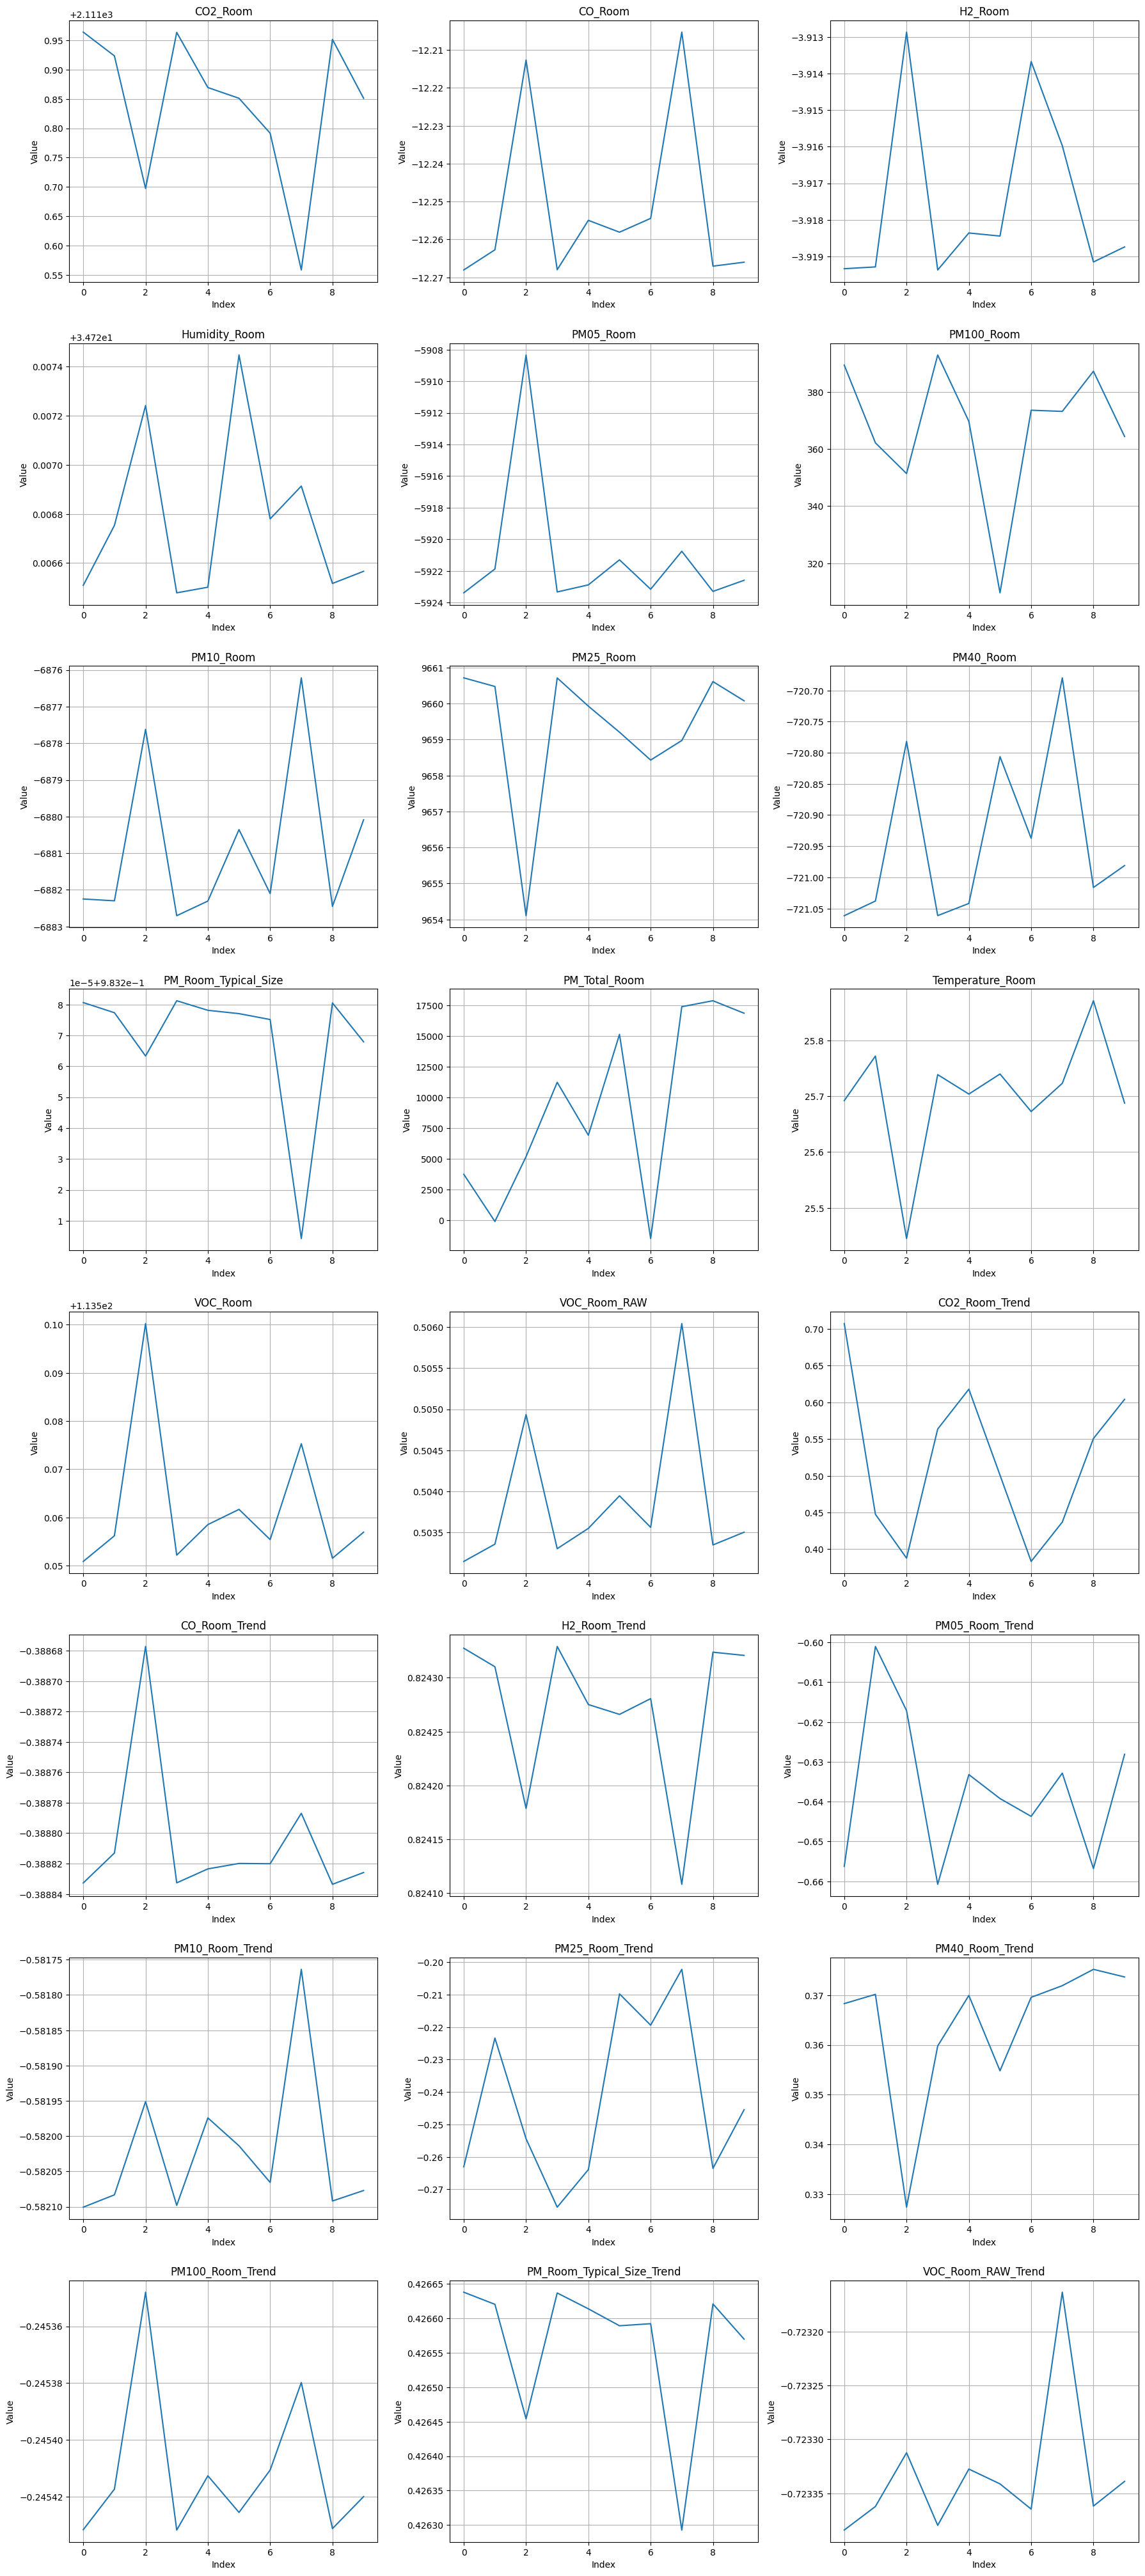

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df =  df_synthetic
num_cols = len(df.columns)
cols = 3  # 3 plots per row
rows = (num_cols // cols) + 1

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    plt.plot(df[col])  # Do NOT specify colors (as per rules)
    plt.title(col)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)

plt.tight_layout()
plt.show()